<a href="https://colab.research.google.com/github/nowkoai/twnow/blob/main/tw1127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ① Twitterで指定キーワードの検索結果を収集

In [1]:
import tweepy
import pandas as pd
import datetime

In [2]:
###########################################################
# TwitterのAPIキー
# CONSUMER_KEY="CONSUMER_KEYを入力"
# CONSUMER_SECRET="CONSUMER_SECRETを入力"
# ACCESS_TOKEN="ACCESS_TOKENを入力"
# ACCESS_SECRET="ACCESS_SECERETを入力"
###########################################################


In [3]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [4]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [5]:
user = api.get_user(screen_name="never_be_a_pm")
user

User(_api=<tweepy.api.API object at 0x7fbc97c26750>, _json={'id': 718015800133586944, 'id_str': '718015800133586944', 'name': 'DAI', 'screen_name': 'never_be_a_pm', 'location': 'DAINOTE', 'profile_location': None, 'description': 'インディバースという小さい会社をやってます。メガベンチャーからITベンチャーに転職し、その後独立し、起業。Webマーケティング、データ分析、プログラミングと嫁、吉祥寺という街が好きです。IT業界のキャリアについて発信しているメディア「DAINOTE」やってます。ICU卒', 'url': 'https://t.co/ASgetdQsFx', 'entities': {'url': {'urls': [{'url': 'https://t.co/ASgetdQsFx', 'expanded_url': 'http://dividable.net/', 'display_url': 'dividable.net', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 27677, 'friends_count': 1066, 'listed_count': 375, 'created_at': 'Thu Apr 07 10:01:21 +0000 2016', 'favourites_count': 41634, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 19651, 'lang': None, 'status': {'created_at': 'Sun Nov 28 01:33:31 +0000 2021', 'id': 1464769392449785861, 'id_str': '1464769392449785861', 'text

In [6]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=100).items(100):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [7]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [8]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [ ]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1465137782444072965,burikiya1301,2021-11-29 10:57:22,【最悪かと思っていたら．．】まだまだ最悪は続きそう．．．あの大坂の最悪の続きは東京で❓それだけは勘弁して欲しいです❣#自民党に殺される #自民党#維新の会#立憲民主党#共産党#れいわhttps://t.co/AJRrcM3ePn,1,0
1,1465137507511971840,uedakanan,2021-11-29 10:56:17,https://t.co/pDNcveBxS6その人達は…多分「自民党の総裁選」の総括もやっていないかも知れませんが。。。。自分はいろんな人の意見を見ながら勉強します。,0,0
2,1465137497797627904,owata23,2021-11-29 10:56:15,選挙で選ばれない自民党大阪府連の会長を無視すればいい。それで追い出されたらそのときはそのとき。覚悟を見せないと。 https://t.co/okGOBIzubj,0,0
3,1465137483398586373,ShujiTani,2021-11-29 10:56:11,自民党を首になり、維新に行くんかな⁉️ https://t.co/nITSPQFacn,0,0
4,1465137464717332485,KOTETSU__www,2021-11-29 10:56:07,自民党政調会長特別補佐、外国・国防担当って、悪い意味でのゲームチェンジャーになる予感しかないw https://t.co/8ZBsyT5R3w,2,0
...,...,...,...,...,...,...
95,1465131720794009604,war_dog_kill,2021-11-29 10:33:17,これが政治家の連中の国民を見捨てている証左だ。何処に、この連中を、支持する要因があると言うのか⁉️これを話題にする時間が、選挙前とコロナ自粛中に報道されていたなら、正に、政局は、代わっていた事だろう。何か意図的に遅く出したの… https://t.co/wdRhv2knrP,0,0
96,1465131718185459712,tennsi212001,2021-11-29 10:33:17,ＴＰＰの重大欠陥を主権者に拡散しなければならない（植草一秀の『知られざる真実』） https://t.co/AjZQhtimt0…：ＩＳＤＳ条項を否定したのは、明確に公約として掲げた安倍晋三自民党自身である。なのに参加するとは https://t.co/dWvFSCBSLH,0,0
97,1465131603722575874,stellaquintet_,2021-11-29 10:32:49,国民の努力を水の泡にし国民を助けもせず何度間違えても学習しない無能政治家たちそして奴らは常に痛むことなく護られている#岸田内閣 #自民党#公明党海外から到着の12人感染(共同通信)#Yahooニュースhttps://t.co/2UXFBUUkSc,5,0
98,1465131555001491456,urushizawa_t,2021-11-29 10:32:38,いち政党がエコーチャンバーにこもって視野狭窄になってたとしたら、なかなかの赤っ恥では「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ @gendai_biz https://t.co/ftS2zHMedF #現代ビジネス,0,0


### ② Twitterデータの前処理

In [65]:
!pip install emoji

In [18]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [19]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [20]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1465251655960588288,clerestory_mxx,2021-11-29 18:29:52,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ,0,0,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ
1,1465251587920740354,zzzNao,2021-11-29 18:29:36,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 https://t.co/SCw5QDPIe2 #スマートニュース#そもそも人件費を費用として考えること自体が間違い#日本の派遣会社制度給与はおかしい#内閣官房… https://t.co/t8y3773rsQ,0,0,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 …,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 …
2,1465251584829386752,xokFGxwaf7a57sN,2021-11-29 18:29:35,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「… https://t.co/RblKuM9ayI,0,0,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「…,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「…
3,1465251553095274502,KDqlRiX4gBQqKqB,2021-11-29 18:29:27,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で… https://t.co/Dq1kaNzui7,0,0,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で…,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で…
4,1465251543012179973,gozen2G,2021-11-29 18:29:25,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ,0,0,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ
...,...,...,...,...,...,...,...,...
95,1465248384676098050,BC_Phantom,2021-11-29 18:16:52,【三橋貴明】自民党の財政政策検討本部 https://t.co/OHZKFAyLTu,0,0,【三橋貴明】自民党の財政政策検討本部,【三橋貴明】自民党の財政政策検討本部
96,1465248378841808902,ryuryu20100518,2021-11-29 18:16:51,頑張れ高市早苗自民党政調会長～！！！,0,0,頑張れ高市早苗自民党政調会長～！！！,頑張れ高市早苗自民党政調会長～！！！
97,1465248365742944261,SpikeyJohnson,2021-11-29 18:16:48,その事務を請け負うのが…、、、さぁお楽しみ🎶 18歳から投票できんだから、あんまり露骨なことしたら #自民党 #公明党 #参院選 負けるよ。 【#速報】「#10万円給付」#クーポン 支給の事務経費さらに増加 967億円に(… https://t.co/GqOQFaOud1,0,0,その事務を請け負うのが…、、、さぁお楽しみ 18歳から投票できんだから、あんまり露骨なことしたら 負けるよ。 【】「」 支給の事務経費さらに増加 967億円に(…,その事務を請け負うのが…、、、さぁお楽しみ 18歳から投票できんだから、あんまり露骨なことしたら 負けるよ。 【】「」 支給の事務経費さらに増加 967億円に(…
98,1465248322281619457,mica_d0,2021-11-29 18:16:37,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ💢,0,0,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ


### ③ TwitterデータをGoogle Drive上に保存する

In [21]:
# Googleドライブをマウント
# ★実行すると認証用のURLが表示される → クリックしてアクセス許可の確認すると認証用のコードが表示される
# → その認証コードを空欄テキストボックスにコピーして、リターンを押すと認証完了して、Googleドライブにアクセスできます！
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# データを保存するディレクトリに移動
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [23]:
# そのディレクトリで、ファイル一覧を表示
%ls

 temp/               tw1127.ipynb   tw_text.csv
'tw1127 (1).ipynb'   tw_all.csv     Untitled0.ipynb


In [27]:
file_name='tw_all.csv'

# Twitter全情報をCSV保存
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [29]:
file_name='tw_text_mod.csv'

# Twitterテキスト情報をCSV保存
# df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8-sig',index=False)
df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8',index=False)

In [31]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1465251655960588288,clerestory_mxx,2021-11-29 18:29:52,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ,0,0,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ,自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ
1,1465251587920740354,zzzNao,2021-11-29 18:29:36,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 https://t.co/SCw5QDPIe2 #スマートニュース#そもそも人件費を費用として考えること自体が間違い#日本の派遣会社制度給与はおかしい#内閣官房… https://t.co/t8y3773rsQ,0,0,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 …,日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛 …
2,1465251584829386752,xokFGxwaf7a57sN,2021-11-29 18:29:35,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「… https://t.co/RblKuM9ayI,0,0,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「…,「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「…
3,1465251553095274502,KDqlRiX4gBQqKqB,2021-11-29 18:29:27,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で… https://t.co/Dq1kaNzui7,0,0,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で…,今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で…
4,1465251543012179973,gozen2G,2021-11-29 18:29:25,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ,0,0,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ,日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ
...,...,...,...,...,...,...,...,...
95,1465248384676098050,BC_Phantom,2021-11-29 18:16:52,【三橋貴明】自民党の財政政策検討本部 https://t.co/OHZKFAyLTu,0,0,【三橋貴明】自民党の財政政策検討本部,【三橋貴明】自民党の財政政策検討本部
96,1465248378841808902,ryuryu20100518,2021-11-29 18:16:51,頑張れ高市早苗自民党政調会長～！！！,0,0,頑張れ高市早苗自民党政調会長～！！！,頑張れ高市早苗自民党政調会長～！！！
97,1465248365742944261,SpikeyJohnson,2021-11-29 18:16:48,その事務を請け負うのが…、、、さぁお楽しみ🎶 18歳から投票できんだから、あんまり露骨なことしたら #自民党 #公明党 #参院選 負けるよ。 【#速報】「#10万円給付」#クーポン 支給の事務経費さらに増加 967億円に(… https://t.co/GqOQFaOud1,0,0,その事務を請け負うのが…、、、さぁお楽しみ 18歳から投票できんだから、あんまり露骨なことしたら 負けるよ。 【】「」 支給の事務経費さらに増加 967億円に(…,その事務を請け負うのが…、、、さぁお楽しみ 18歳から投票できんだから、あんまり露骨なことしたら 負けるよ。 【】「」 支給の事務経費さらに増加 967億円に(…
98,1465248322281619457,mica_d0,2021-11-29 18:16:37,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ💢,0,0,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ,自民党を守る事じゃなく日本を守るのが保守の役割なのに自民党や政権批判したら保守じゃ無いってどう言う事だよ


In [32]:
# ファイル保存じた現在パスを表示
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [33]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

 temp/               tw1127.ipynb   tw_text.csv       Untitled0.ipynb
'tw1127 (1).ipynb'   tw_all.csv     tw_text_mod.csv


### ④ Twitterデータを形態素解析/Mecab

In [37]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
Checking out files: 100% (65/65), done.


In [40]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [45]:
import MeCab

# Mecabの動作確認（--> 形態素解析/分かち書き確認）
m = MeCab.Tagger()
sample_txt = "私はPythonでプログラミングをします"
print("Mecab:\n", m.parse(sample_txt))

Mecab:
 私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
Python	名詞,一般,*,*,*,*,*
で	助詞,格助詞,一般,*,*,*,で,デ,デ
プログラミング	名詞,サ変接続,*,*,*,*,プログラミング,プログラミング,プログラミング
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
EOS



In [46]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
file_name='tw_text_mod.csv'
df_tw = pd.read_csv(file_name)

In [56]:
# Pandasをリスト化
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [57]:
# Mecabで形態素解析する文書の確認
tw_data

['自民党もクソ役に立たないけど他の政党も（特にミンスは）それ以上にクソ役に立たないからな生活保護廃止にしてベーシックインカム導入と医療費無償化、国公立大学無償化すればいいんですよもちろん日本国籍がある人と日本で働いて税金を収めている人のみですよ',
 '日本初の段ボール事業会社のトップが日本の企業に鳴らす警笛  … ',
 '「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ  (現代ビジネス)21/11/29立憲・共産が「多様性の統一」「ジェンダー平等」を一大テーマに据えて選挙に臨んでしまった。街の声は、SNSの声とは違った。〘「… ',
 '今回の岸田総理は漢をあげたなゴリゴリの共産党員の我が親が(俺はノンシュガー)見直した！と言ったぐらいだから当たり前のことをしただけなんだけど自民党のしがらみでその当たり前が出来てなかったよねこの調子で… ',
 '日本女性は独身か、仲良い同性の友達と一緒になるのが幸せなんじゃん？知らんけど自民党の働きアリ政策のせいだろうけど、低賃金でこき使われて余裕が無く当たり散らす男と一緒になっても不幸だよ',
 '自民党だけじゃないけど世間に騒がれたらまたもや総理交代するぽいが,,,,,,',
 '3年前に自民党が新聞広告に出した通りになったな、今の日本。 ',
 '他党＝自民党 ',
 '斉藤健一議員画像サイトウ\u3000ケンイチ斉藤\u3000健一選出区見沼区 所属会派公明党阪本克己議員画像サカモト\u3000カツミ阪本\u3000克己選出区桜区 所属会派民進改革渋谷佳孝議員画像シブヤ\u3000ヨシタカ渋谷\u3000佳孝選出区大宮区 所属会派自民党真政島崎豊議員画像',
 'ナイスな情報。感謝です。自民党でも応援すべき人と落とすべき人をはっきりさせるべきです。 です。岸田首相が目覚めて、 ようになれば、民意も明確になると思うのです… ',
 '「ツイッターをやめる」それが立憲・共産が自民党に勝てる唯一の道だ（現代ビジネス）分析は概ね共感するけど、結論がTwitterやめろじゃますます先鋭化するだけなんじゃないのかな？ ',
 'これが自民党を応援してる人の希望だったんでしょうか？聞く耳を持つ総理らしいから、自民党に連絡を入れたら、方向が変わるのかも知れないｗ変わらないだろうね。聞くだけで聞き流してしまうだけだか

In [49]:
#Mecabを使用して、形態素解析
mecab = MeCab.Tagger("-Ochasen")

#"名詞", "動詞", "形容詞", "副詞"を格納するリスト
words=[]

In [50]:
#ファイルを読込み    
for tw in tw_data:
#     print('--> ', tw)
    
    #Mecabで形態素解析を実施
    node = mecab.parseToNode(tw)

    while node:
        word_type = node.feature.split(",")[0]
#         print(word_type)

        #取得する単語は、"名詞", "動詞", "形容詞", "副詞"
        if word_type in ["名詞", "動詞", "形容詞", "副詞"]:
#             print("----->", node.surface)
            words.append(node.surface)

        node = node.next

In [59]:
# 形態素解析の結果として、取得した単語リストを確認
words

['自民党',
 '役に立た',
 '他',
 '政党',
 '特に',
 'ミンス',
 'それ',
 '以上',
 '役に立た',
 '生活',
 '保護',
 '廃止',
 'し',
 'ベーシックインカム',
 '導入',
 '医療',
 '費',
 '無償',
 '化',
 '国公立',
 '大学',
 '無償',
 '化',
 'すれ',
 'いい',
 'ん',
 'もちろん',
 '日本',
 '国籍',
 'ある',
 '人',
 '日本',
 '働い',
 '税金',
 '収め',
 'いる',
 '人',
 '日本',
 '初',
 '段ボール',
 '事業',
 '会社',
 'トップ',
 '日本',
 '企業',
 '鳴らす',
 '警笛',
 'ツイッター',
 'やめる',
 'それ',
 '立憲',
 '共産',
 '自民党',
 '勝てる',
 '唯一',
 '道',
 '(',
 '現代',
 'ビジネス',
 ')',
 '21',
 '/',
 '11',
 '/',
 '29',
 '立憲',
 '共産',
 '多様',
 '性',
 '統一',
 'ジェンダー',
 '平等',
 '一大',
 'テーマ',
 '据え',
 '選挙',
 '臨ん',
 'しまっ',
 '街',
 '声',
 'SNS',
 '声',
 '違っ',
 '〘「…',
 '今回',
 '岸田',
 '総理',
 '漢',
 'あげ',
 'ゴリゴリ',
 '共産',
 '党員',
 '親',
 '(',
 '俺',
 'シュガー',
 ')',
 '見直し',
 '言っ',
 '当たり前',
 'こと',
 'し',
 'ん',
 '自民党',
 'しがらみ',
 '当たり前',
 '出来',
 'て',
 '調子',
 '日本',
 '女性',
 '独身',
 '仲良い',
 '同性',
 '友達',
 '一緒',
 'なる',
 'の',
 '幸せ',
 'ん',
 '知ら',
 '自民党',
 '働き',
 'アリ',
 '政策',
 'せい',
 '賃金',
 'こき使わ',
 'れ',
 '余裕',
 '無く',
 '当たり散らす',
 '男',
 '一緒',
 'なっ',
 '不幸',
 '自民党',
 '世間',
 '騒が',
 

### ⑤ ワードクラウドの表示

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [61]:
# ワードのリストをスペース区切りで連結
txt = " ".join(words)
txt

'自民党 役に立た 他 政党 特に ミンス それ 以上 役に立た 生活 保護 廃止 し ベーシックインカム 導入 医療 費 無償 化 国公立 大学 無償 化 すれ いい ん もちろん 日本 国籍 ある 人 日本 働い 税金 収め いる 人 日本 初 段ボール 事業 会社 トップ 日本 企業 鳴らす 警笛 ツイッター やめる それ 立憲 共産 自民党 勝てる 唯一 道 ( 現代 ビジネス ) 21 / 11 / 29 立憲 共産 多様 性 統一 ジェンダー 平等 一大 テーマ 据え 選挙 臨ん しまっ 街 声 SNS 声 違っ 〘「… 今回 岸田 総理 漢 あげ ゴリゴリ 共産 党員 親 ( 俺 シュガー ) 見直し 言っ 当たり前 こと し ん 自民党 しがらみ 当たり前 出来 て 調子 日本 女性 独身 仲良い 同性 友達 一緒 なる の 幸せ ん 知ら 自民党 働き アリ 政策 せい 賃金 こき使わ れ 余裕 無く 当たり散らす 男 一緒 なっ 不幸 自民党 世間 騒が れ またもや 総理 交代 する ぽい ,,,,,, 3 年 前 自民党 新聞 広告 出し 通り なっ 今 日本 党 自民党 斉藤 健一 議員 画像 サイ トウ ケン イチ 斉藤 健 一 選出 区 見沼 区 所属 会派 公明党 阪本 克己 議員 画像 サカモト カツミ 阪本 克己 選出 区 桜 区 所属 会派 民 進 改革 渋谷 佳孝 議員 画像 シブヤ ヨシ タカ 渋谷 佳孝 選出 区 大宮 区 所属 会派 自民党 政 島崎 豊 議員 画像 ナイス 情報 感謝 自民党 応援 す 人 落とす 人 はっきり さ せる 岸田 首相 目覚め よう なれ 民意 明確 なる 思う の ツイッター やめる それ 立憲 共産 自民党 勝てる 唯一 道 現代 ビジネス 分析 概ね 共感 する 結論 Twitter やめろ ますます 先鋭 化 する なん の これ 自民党 応援 し てる 人 希望 ん 聞く 耳 持つ 総理 自民党 連絡 入れ 方向 変わる の 知れ 変わら 聞く 聞き流し しまう 沖縄 ヘイト 議員 自民党 小島 健一 神奈川 県議 米 軍 基地 反対 し 抗議 する 人 たち 基地 外 きち い ）」( ﾟ Д ﾟ ;) 立憲 自民党 立憲 連合 党 方 よっぽど 悲惨 思い 結局 記者 ( マ

In [63]:
# 日本語の True Font のインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,751 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155440 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

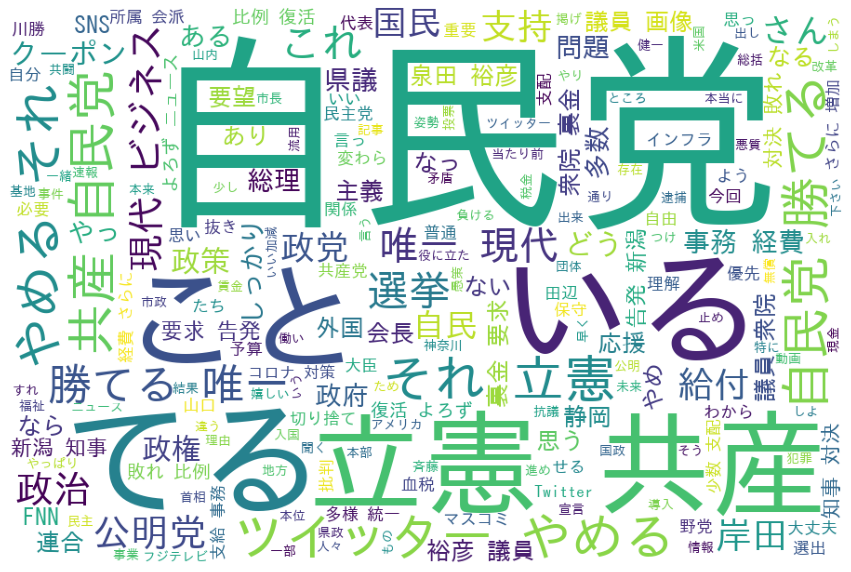

In [64]:
# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(txt)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()